In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


## Hampel filter

In [ ]:
, label="CS 1"

## Data Loading

In [29]:
def ocp_cor_import(filename):
    """ Import cor file as pandas dataframe."""
    return pd.read_csv(
        filename,
        skiprows=26,
        sep='\s+',
        header=None,
        names=["E", "i", "T"],
    ) #index_col="Freq")


try:
    OCP_CS_1_df = ocp_cor_import("Cast_Stellite1_Sample1_Actual/OCP.cor")
    OCP_CS_2_df = ocp_cor_import("Cast_Stellite1_Sample2_Actual/OCP.cor")
    OCP_CS_3_df = ocp_cor_import("Cast_Stellite1_Sample3_Actual/OCP.cor")
    OCP_HS_1_df = ocp_cor_import("HIPed_Stellite1_Sample1_Actual/OCP.cor")    
    
except FileNotFoundError as e:
    print(f"Error: File was not found.")
    print(e.message)
    print(e.args)
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

OCP_CS_1_df

E             i        T
0      -0.326304  5.000000e-11      0.1
1      -0.326281  5.000000e-11      0.2
2      -0.326251  5.000000e-11      0.3
3      -0.326228  5.000000e-11      0.4
4      -0.326211  5.000000e-11      0.5
...          ...           ...      ...
143995 -0.152261  5.000000e-11  14399.6
143996 -0.152255  5.000000e-11  14399.7
143997 -0.152253  5.000000e-11  14399.8
143998 -0.152250  5.000000e-11  14399.9
143999 -0.152254  5.000000e-11  14400.0

[144000 rows x 3 columns]

In [44]:
import scipy
from scipy.stats import zscore

arr = OCP_CS_1_df["E"].to_numpy()
arr[np.abs(zscore(OCP_CS_1_df["E"])) > 3] = None

print(arr)


[      nan       nan       nan ... -0.152253 -0.15225  -0.152254]


CS 1
CS 2
CS 3


[]

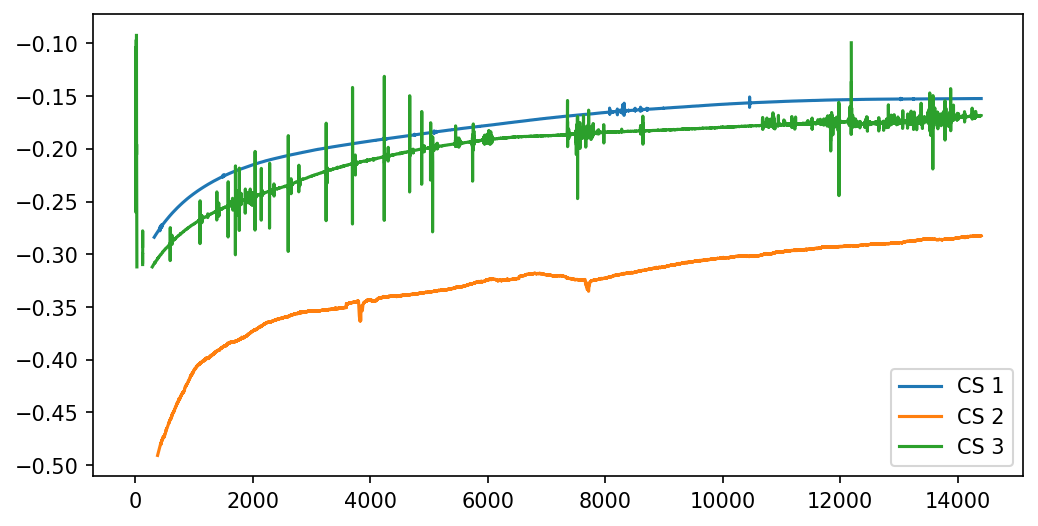

In [45]:
fig, ax = plt.subplots(figsize=(8,4), sharex=True, dpi=150)

for df, name in zip([OCP_CS_1_df, OCP_CS_2_df, OCP_CS_3_df], ["CS 1", "CS 2", "CS 3"]):
    print(name)

    arr = df["E"].to_numpy()
    arr[np.abs(zscore(df["E"])) > 3] = None

    ax.plot(df["T"].to_numpy(), arr, label=name)


ax.legend()
ax.plot()
